<a href="https://colab.research.google.com/github/Euzoka95/PDA2024/blob/main/IT7103_Lab_3_EUzoka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 1: Import the dataset to google colab

In [4]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Load the dataset
data = pd.read_csv('stroke.csv')

# Display the first few rows of the dataset
data.head()


Saving stroke.csv to stroke.csv


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


TASK 2: Preprocess the data: To do this we have to clean the dataset by handling the missing values, converting categorical variables, removing duplicates

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/stroke.csv')

# Display the first few rows of the dataset
print("Initial Data:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Fill missing BMI values with the median
data['bmi'].fillna(data['bmi'].median(), inplace=True)

# Convert categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

# Check for duplicates
print("\nDuplicates:")
print(data.duplicated().sum())

# Remove duplicates if any
data = data.drop_duplicates()

# Normalize numerical features
numerical_features = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Save the cleaned dataset to a new CSV file
data.to_csv('/content/cleaned_stroke.csv', index=False)

print("\nCleaned Data:")
print(data.head())


Initial Data:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  

Missing Values:
id                     0


TASK 3: A) Determine the task: From the dataset, we can deduce that the target variable is 'stroke', the goal is to determine whether a patient has stroke (1 = Yes or 0 = No). The target variable has discrete variables, hence it is a classification task.

In [8]:
# Inspect the target variable
print(data['stroke'].unique())

# Check the data type of the target variable
print(data['stroke'].dtype)

[1 0]
int64


TASK 3: B) Fine-tune 3 models for the determined task, to do this, first we split the data which has been earlier loaded and cleaned.

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = data.drop('stroke', axis=1)
y = data['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("Training set shape (features):", X_train.shape)
print("Testing set shape (features):", X_test.shape)
print("Training set shape (target):", y_train.shape)
print("Testing set shape (target):", y_test.shape)


Training set shape (features): (4088, 17)
Testing set shape (features): (1022, 17)
Training set shape (target): (4088,)
Testing set shape (target): (1022,)


TASK 3: B) Fine-tune 3 models for classification task, carefully select the model evaluation metric to fit into this problem.
The 3models are :

1. Logistic regression
2. Random Forest
3. Support Vector Machine

The models can be evaluated using accuracy, precision, recall, F1 score, and ROC-AUC. We can also visualize the confusion matrix for each model, which helps in understanding the performance in terms of false positives and false negatives.


Logistic Regression
Accuracy: 0.94, Precision: 0.00, Recall: 0.00, F1 Score: 0.00, ROC-AUC: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde

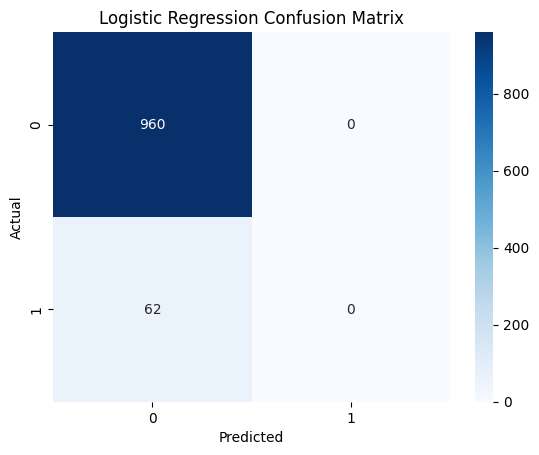

Random Forest
Accuracy: 0.94, Precision: 0.00, Recall: 0.00, F1 Score: 0.00, ROC-AUC: 0.82

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde

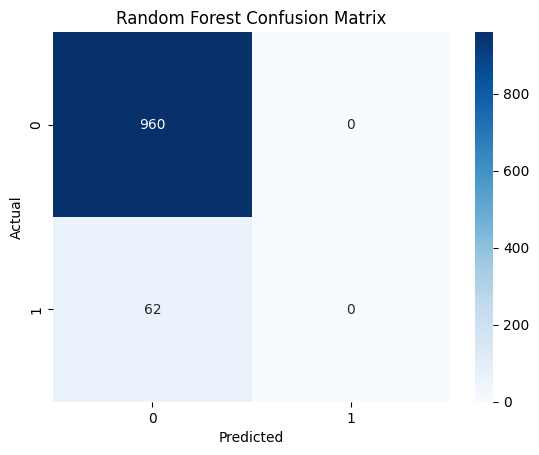

Support Vector Machine
Accuracy: 0.94, Precision: 0.00, Recall: 0.00, F1 Score: 0.00, ROC-AUC: 0.49

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde

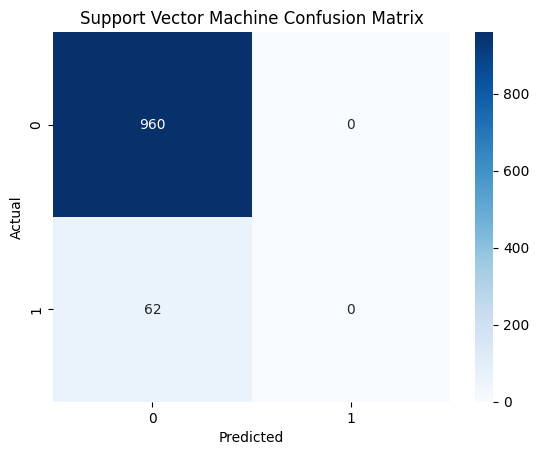

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


#this function evaluated each model's performance
def evaluate_model(y_test, y_pred, y_pred_prob):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}, ROC-AUC: {roc_auc:.2f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_log_reg_prob = log_reg.predict_proba(X_test)[:,1]
print("Logistic Regression")
evaluate_model(y_test, y_pred_log_reg, y_pred_log_reg_prob)
cm = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_random_forest_prob = random_forest.predict_proba(X_test)[:,1]
print("Random Forest")
evaluate_model(y_test, y_pred_random_forest, y_pred_random_forest_prob)
cm = confusion_matrix(y_test, y_pred_random_forest)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Support Vector Machine
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_pred_svm_prob = svm.predict_proba(X_test)[:,1]
print("Support Vector Machine")
evaluate_model(y_test, y_pred_svm, y_pred_svm_prob)
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Support Vector Machine Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
